In [315]:
import numpy as np

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from typing import Union

In [316]:
X, y = make_classification(
    n_samples=1000,
    n_features=3,
    n_informative=3,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.01,
    class_sep=1.0,
    random_state=42
)

In [317]:
def sigmoid(z: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
  """
  Compute the sigmoid of z.

  Parameters:
  z: A scalar or numpy array of any size.

  Returns:
  The sigmoid of z.
  """
  return 1 / (1 + np.exp(-z))

In [318]:
w = np.random.randn(X.shape[1], 1)
b = np.random.randn()

In [319]:
y_pred = sigmoid(np.dot(X, w) + b)
y_pred = y_pred.reshape(-1)
y_pred

array([7.55101003e-02, 6.50165882e-02, 2.67542727e-01, 9.98036307e-01,
       1.94563553e-01, 3.69558970e-01, 5.01089774e-01, 4.72642516e-01,
       1.96292161e-01, 1.43704354e-01, 6.17954808e-01, 3.57582853e-01,
       7.04366906e-01, 8.98634420e-01, 4.02518707e-02, 1.15680029e-01,
       8.78906638e-01, 9.77774261e-01, 8.73318637e-01, 4.01366512e-01,
       1.34968350e-01, 1.55201581e-01, 1.50878092e-01, 8.76778720e-01,
       8.46080277e-01, 8.30036198e-02, 1.20814912e-01, 9.76227515e-01,
       9.16084143e-02, 7.83208547e-01, 7.50810192e-01, 8.13870607e-01,
       9.86412080e-01, 1.88525465e-01, 9.87613422e-01, 3.07900440e-01,
       9.77512345e-01, 3.88928787e-01, 5.02809793e-01, 9.82913537e-01,
       9.03044401e-01, 6.55913347e-02, 7.57840295e-01, 3.32192066e-01,
       2.01352490e-01, 9.57749678e-01, 4.50723144e-01, 8.33692753e-01,
       7.45728804e-01, 6.14495739e-01, 9.43514941e-01, 1.83114627e-01,
       6.81049465e-01, 8.24922208e-01, 9.93322509e-01, 6.85343542e-01,
      

In [320]:
def logloss(w: np.ndarray, b: np.ndarray, X: np.ndarray, y: np.ndarray):
  """
  Computes the logistic regression log loss.

  Parameters:
  w: A numpy array representing the weights.
  b: A scalar representing the bias.
  X: A numpy array of input features.
  y: A numpy array of true labels.

  Returns:
  The log loss as a float.
  """
  y_pred = sigmoid(np.dot(X, w) + b)
  y_pred = y_pred.reshape(-1)
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  m = len(y)

  return -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [322]:
def accuracy_score(y, y_pred, threshold=0.5):
  """
  Calculate the accuracy of predictions.

  Parameters:
  y (numpy array): True labels.
  y_pred (numpy array): Predicted probabilities.
  threshold (float, optional): Threshold for converting predicted probabilities to binary labels. Default is 0.5.

  Returns:
  float: Accuracy of the predictions as the proportion of correctly predicted labels.
  """
  n_total = len(y)
  n_correct = ((y_pred.reshape(-1) >= threshold).astype(int) == y).sum()

  return n_correct / n_total

In [323]:
def weight_gradients(y, y_pred, X):
  """
  Calculate the gradient of the loss function with respect to the weights.

  Parameters:
  y (numpy array): True labels.
  y_pred (numpy array): Predicted probabilities.
  X (numpy array): Feature matrix.

  Returns:
  numpy array: Gradient of the loss with respect to the weights.
  """
  return (-1 / len(y)) * np.dot(X.T, y - y_pred.reshape(-1))

In [324]:
def bias_gradient(y, y_pred):
  """
  Calculate the gradient of the loss function with respect to the bias term.

  Parameters:
  y (numpy array): True labels.
  y_pred (numpy array): Predicted probabilities.

  Returns:
  float: Gradient of the loss with respect to the bias.
  """
  m = len(y)
  return -(1 / m) * np.sum(y - y_pred)

In [325]:
# Before training
w = np.random.randn(X.shape[1])
b = 0
y_pred = sigmoid(np.dot(X, w) + b)

print(f'Weights:\n {w}')
print(f'Bias: {b}')
print(f'Accuracy: {accuracy_score(y, y_pred)}')

Weights:
 [-0.18551581 -0.00313409  0.21406964]
Bias: 0
Accuracy: 0.734


In [326]:
n_iterations = 300
learning_rate = 1
losses = []
accuracies = []

for _ in range(n_iterations):
  losses.append(logloss(w, b, X, y))
  y_pred = sigmoid(np.dot(X, w) + b)
  accuracies.append(accuracy_score(y, y_pred))
  w -= learning_rate * weight_gradients(y, y_pred, X)
  b -= learning_rate * bias_gradient(y, y_pred)

In [327]:
# After training
y_pred = sigmoid(np.dot(X, w) + b)

print(f'Weights:\n {w}')
print(f'Bias: {b}')
print(f'Accuracy: {accuracy_score(y, y_pred)}')

Weights:
 [-1.36365102 -2.10000212  3.93933178]
Bias: -0.35640331319704766
Accuracy: 0.922


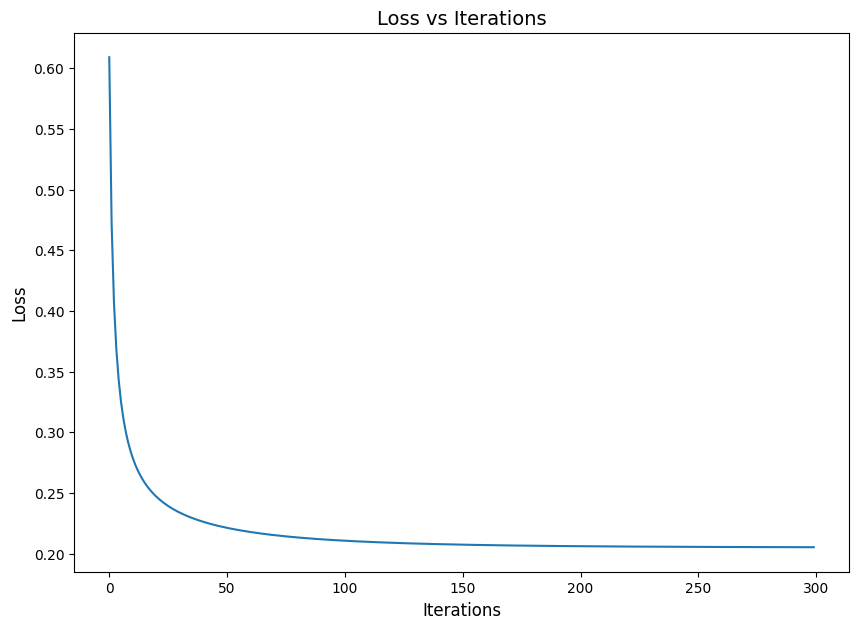

In [328]:
plt.figure(figsize=(10, 7))
plt.plot(range(len(losses)), losses)
plt.title('Loss vs Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Iterations', fontsize=12)
plt.show()

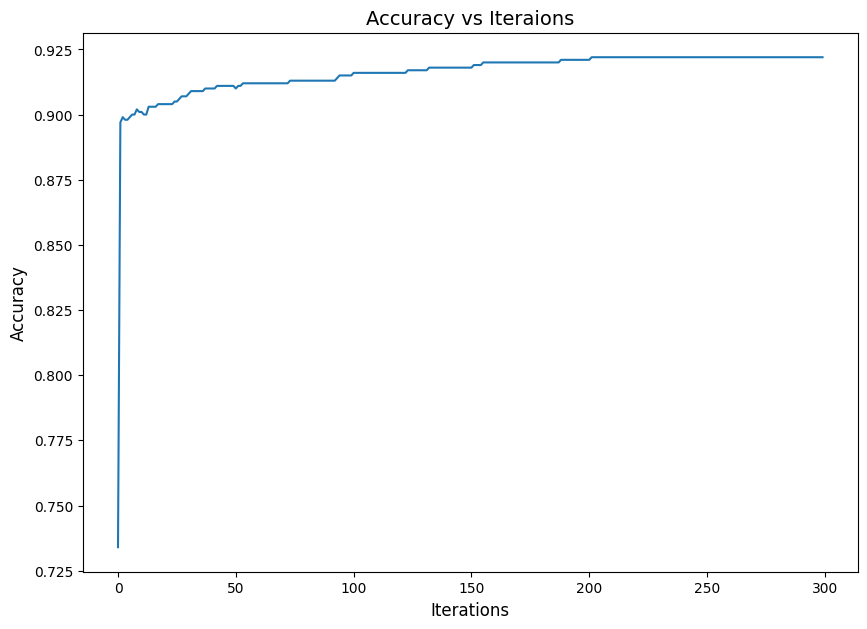

In [329]:
plt.figure(figsize=(10, 7))
plt.plot(range(len(accuracies)), accuracies)
plt.title('Accuracy vs Iteraions', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Iterations', fontsize=12)
plt.show()

In [335]:
class LogisticRegressionV1:

  def __init__(self, n_features, learning_rate=0.001, n_iterations=1000):
    self.w = np.random.randn(n_features)
    self.b = np.random.randn()
    self.learning_rate = learning_rate
    self.n_iterations = n_iterations
    self.losses = []
    self.accuracies = []

  def sigmoid(self, z: np.ndarray) -> float:
    return 1 / (1 + np.exp(-z))

  def logloss(self, X: np.ndarray, y: np.ndarray) -> float:
    y_pred = self.sigmoid(np.dot(X, self.w) + self.b)
    y_pred = y_pred.reshape(-1)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10) # to prevent divide by 0
    m = len(y)

    return (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

  def accuracy_score(self, y, y_pred, threshold=0.5):
    n_total = len(y)
    n_correct = ((y_pred.reshape(-1) >= threshold).astype(int) == y).sum()

    return n_correct / n_total

  def weight_gradients(self, y, y_pred, X):
    m = len(y)
    return (-1 / m) * np.dot(X.T, y - y_pred.reshape(-1))

  def bias_gradient(self, y, y_pred):
    m = len(y)
    return (-1 / m) * np.sum(y - y_pred.reshape(-1))

  def fit(self, X, y):
    for _ in range(self.n_iterations):
      y_pred = self.sigmoid(np.dot(X, self.w) + self.b)
      self.losses.append(self.logloss(X, y))
      self.accuracies.append(self.accuracy_score(y, y_pred))
      self.w -= self.learning_rate * self.weight_gradients(y, y_pred, X)
      self.b -= self.learning_rate * self.bias_gradient(y, y_pred)

  def predict(self, X, threshold=0.5):
    y_pred = self.sigmoid(np.dot(X, self.w) + self.b)
    y_pred = y_pred.reshape(-1)

    return (y_pred >= threshold).astype(int)

  def predict_probs(self, X):
    return self.sigmoid(np.dot(X, self.w) + b)

  def plot_loss_curves(self):
    plt.figure(figsize=(10, 7))
    plt.plot(range(len(self.losses)), self.losses)
    plt.title('Loss vs Iterations', fontsize=14)
    plt.ylabel('Loss', fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.show()

  def plot_accuracy_curve(self):
    plt.figure(figsize=(10, 7))
    plt.plot(range(len(self.accuracies)), self.accuracies)
    plt.title('Accuracy vs Iterations', fontsize=14)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.show()

In [336]:
model = LogisticRegressionV1(n_features=X.shape[1],
                             n_iterations=300,
                             learning_rate=1)
model

In [337]:
# Before training
print(f'Weights: {model.w}')
print(f'Bias: {model.b}')
print(f'Accuracy: {model.accuracy_score(y, model.predict(X)) * 100:.2f}%')

Weights: [ 0.9392386  -0.86396488 -0.45628164]
Bias: -1.2563320399568476
Accuracy: 49.30%


In [338]:
model.fit(X, y)

In [339]:
# Before training
print(f'Weights: {model.w}')
print(f'Bias: {model.b}')
print(f'Accuracy: {model.accuracy_score(y, model.predict(X)) * 100:.2f}%')

Weights: [-1.36176859 -2.09679444  3.93690696]
Bias: -0.3563423640748843
Accuracy: 92.20%
